Importing Libraries

In [ ]:
# Install bertopic
!pip install bertopic

In [35]:
!pip install joblib

In [36]:
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
df = pd.read_csv('MGOclean.csv')
df.columns


Index(['Unnamed: 0', 'clean_des_col_2'], dtype='object')

In [38]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [39]:
df.columns
cols = {df.columns[0]: "description"}
df = df.rename(columns=cols)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41751 entries, 0 to 41750
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  41751 non-null  object
dtypes: object(1)
memory usage: 326.3+ KB


In [41]:
stopwords = nltk.corpus.stopwords.words('english')

In [42]:
#Converting col into a string type
df['description'] = df['description'].apply(str)

In [43]:
# Remove stopwords
df['description'] = df['description'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# Lemmatization
df['description'] = df['description'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
# Take a look at the data
df.head()

,description
0,live austin tx based address location actually...
1,already account register santa rosa county
2,please let u know send document registration p...
3,noc appearing want request occupancy inspection
4,fixed problem swepco said say need inspection ...


In [44]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [45]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['description'])

In [ ]:
knn_from_joblib = joblib.load('filename.pkl')

In [46]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,16789,-1_permit_need_inspection_thank
1,0,665,0_returned_application_app_status
2,1,660,1_mailto_gov_org_ryan
3,2,531,2_print_receipt_paid_printing
4,3,515,3_verify_verification_phone_verified
...,...,...,...
426,425,10,425_commencement_notice_18586_2101299bd
427,426,10,426_disconnect_reconnect_blueberry_140743
428,427,10,427_event_birthday_party_dolly
429,428,10,428_guice_electric_95969_perrmit


In [ ]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

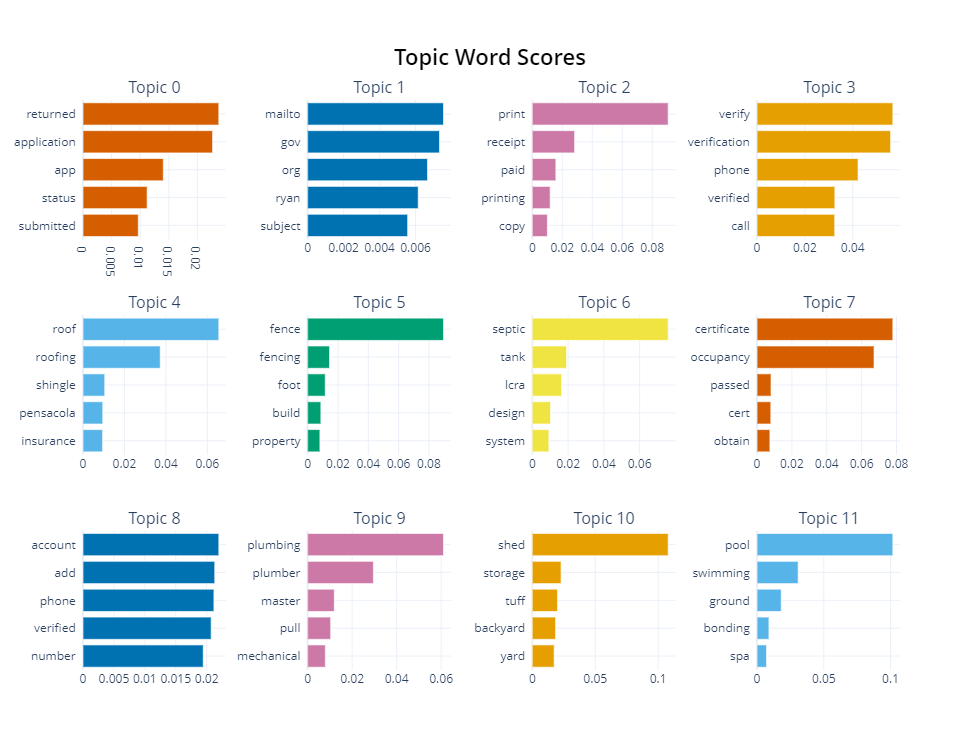

In [48]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

In [49]:
topic_model.save("MGO_topic_model")

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [3]:
import pickle

In [4]:
from joblib import Parallel, delayed
import joblib

In [57]:
joblib.dump(topic_model, 'MGO_topicmodel.pkl')

['MGO_topicmodel.pkl']

In [5]:
topic_model = joblib.load('MGO_topicmodel.pkl')

In [31]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,16789,-1_permit_need_inspection_thank
1,0,665,0_returned_application_app_status
2,1,660,1_mailto_gov_org_ryan
3,2,531,2_print_receipt_paid_printing
4,3,515,3_verify_verification_phone_verified
...,...,...,...
426,425,10,425_commencement_notice_18586_2101299bd
427,426,10,426_disconnect_reconnect_blueberry_140743
428,427,10,427_event_birthday_party_dolly
429,428,10,428_guice_electric_95969_perrmit


In [12]:
topic_model.get_topic(0)

[('returned', 0.023746151612711604),
 ('application', 0.02265972498610426),
 ('app', 0.014039587019001576),
 ('status', 0.011214086662888761),
 ('submitted', 0.009664771117416223),
 ('received', 0.007992277200988326),
 ('back', 0.00786352206232491),
 ('find', 0.007735998705663766),
 ('change', 0.006696744845766533),
 ('cannot', 0.006112540435363281)]

In [32]:
topic_model.get_topic(1)

[('mailto', 0.007554565308696535),
 ('gov', 0.007333016736206949),
 ('org', 0.006665681709204844),
 ('ryan', 0.006148152734642451),
 ('subject', 0.005561905380794327),
 ('cc', 0.005186379159921557),
 ('scpdc', 0.005052194475662369),
 ('ken', 0.004886203280197067),
 ('com', 0.004727035997203599),
 ('stpgov', 0.0046126238174977)]

In [33]:
topic_model.get_topic(2)

[('print', 0.09066507151865835),
 ('receipt', 0.028230878168272907),
 ('paid', 0.01569946121808122),
 ('printing', 0.011898481752559859),
 ('copy', 0.010048597501408553),
 ('issued', 0.009208446044510139),
 ('actual', 0.009068501386669066),
 ('tab', 0.0076777638825727785),
 ('permit', 0.0076170994974066744),
 ('able', 0.00727818076117591)]

In [34]:
topic_model.get_topic(3)

[('verify', 0.05679416098700175),
 ('verification', 0.05586858496369588),
 ('phone', 0.04224610047905365),
 ('verified', 0.032548584733383054),
 ('call', 0.03248908706210985),
 ('missed', 0.029383228770447845),
 ('number', 0.02076028684141468),
 ('automated', 0.016271998786822485),
 ('account', 0.015232318673342172),
 ('attempt', 0.012860228226712215)]

In [35]:
topic_model.get_topic(4)

[('roof', 0.06556223784677911),
 ('roofing', 0.03727668017014759),
 ('shingle', 0.010502209562555135),
 ('pensacola', 0.009551713006340872),
 ('insurance', 0.00945931886958913),
 ('fl', 0.008043194625134812),
 ('metal', 0.007392311297511578),
 ('final', 0.006731413670409166),
 ('replacement', 0.006199399864280817),
 ('damage', 0.006011526598479744)]

In [36]:
topic_model.get_topic(5)

[('fence', 0.0896340008923361),
 ('fencing', 0.014447945994546511),
 ('foot', 0.011590999540666112),
 ('build', 0.008706699980645962),
 ('property', 0.008067769915069996),
 ('replace', 0.008065767073521858),
 ('put', 0.00806280696749628),
 ('chain', 0.007915515455283616),
 ('privacy', 0.007451838322796698),
 ('yard', 0.006313604175491187)]

In [37]:
topic_model.get_topic(6)

[('septic', 0.07597880524000591),
 ('tank', 0.019128842539418406),
 ('lcra', 0.01639658168266616),
 ('design', 0.01020420093491614),
 ('system', 0.009246587508299537),
 ('ossf', 0.008862589968542146),
 ('travis', 0.007277723389237954),
 ('property', 0.00657701548742662),
 ('county', 0.0062532619224746535),
 ('house', 0.0052424201187361115)]

In [38]:
topic_model.get_topic(7)

[('certificate', 0.07792172386593466),
 ('occupancy', 0.06713148432987297),
 ('passed', 0.008036144589559641),
 ('cert', 0.007924223106046464),
 ('obtain', 0.007380305784830952),
 ('apply', 0.006872139562406911),
 ('business', 0.006354472679343742),
 ('mortgage', 0.005384773314105271),
 ('completed', 0.004924827947618677),
 ('completion', 0.0045896470496087005)]

In [39]:
topic_model.get_topic(8)

[('account', 0.021967328925275805),
 ('add', 0.02130762214656069),
 ('phone', 0.021171506589088847),
 ('verified', 0.020726911504167403),
 ('number', 0.01944504433525135),
 ('match', 0.016414724214609558),
 ('verify', 0.014882029231486273),
 ('verification', 0.010524101479666524),
 ('cell', 0.008468590502809766),
 ('added', 0.008055990394581089)]

In [40]:
topic_model.get_topic(9)

[('plumbing', 0.06106594999893914),
 ('plumber', 0.02956418325082114),
 ('master', 0.011973190847063466),
 ('pull', 0.01035025812926487),
 ('mechanical', 0.00795327132407381),
 ('rmp', 0.007926466163328524),
 ('permit', 0.0060421910364964896),
 ('sewer', 0.0059652148051540675),
 ('job', 0.005533602974725736),
 ('company', 0.005168603978919782)]

In [41]:
topic_model.get_topic(10)

[('shed', 0.10797315329555578),
 ('storage', 0.022832160331654736),
 ('tuff', 0.02002621815698401),
 ('backyard', 0.01848766111847472),
 ('yard', 0.01732356939874707),
 ('build', 0.016006206359274546),
 ('built', 0.012250727511276252),
 ('depot', 0.011585695156243277),
 ('structure', 0.010066275986202503),
 ('foot', 0.009679459834295195)]